# Imports

In [112]:
!pip install pyalgotrading==2023.10.3

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 802.6 kB/s eta 0:00:00B/s eta 0:00:01
  Attempting uninstall: pyalgotrading
    Found existing installation: pyalgotrading 2023.10.1
    Uninstalling pyalgotrading-2023.10.1:
      Successfully uninstalled pyalgotrading-2023.10.1


In [113]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [114]:
connection = AlgoBullsConnection()

In [115]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [116]:
API_TOKEN = "f7aac5cc88a98973c64b1a618b11590112c05383"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

In [117]:
from on_balance_volume import On_Balace_Volume

In [118]:
response = connection.create_strategy(On_Balace_Volume, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 136089,
 'strategyId': '16475c5c5c464ad7ae644a20680c9cc3'}

In [119]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [120]:
instrument = connection.search_instrument('AAPL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AAPL'

## Setup Parameters

In [121]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [122]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [123]:
parameters = {
  'TIME_PERIOD': 12
}

In [124]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [125]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'On-balance Volume' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Vendor Name             │ ALPACAV2                  │
├─────────────────────────┼───────────────────────────┤
│ Strategy Name           │ On-balance Volume         │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:AAPL']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00-04:00 │
├─────────────────────────┼───────────

### Status

In [126]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [127]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (10)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]


----------------------------------------
Faced an error while fetching logs.
----------------------------------------

Looking for a dedicated virtual server to execute your strategy... (55)

In [128]:
print(logs)

[2023-10-30 23:07:57] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-30 23:07:57] Sanity checks on cfg successful.
[2023-10-30 23:07:57] Currency set to "USD"
[2023-10-30 23:07:57] Setting up broker connection...
[2023-10-30 23:07:58] Starting ALPACAV2 in PAPER mode...
[2023-10-30 23:07:59] Broker connection has been setup successfully.
[2023-10-30 23:07:59] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-10-30 23:07:59] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-30 23:07:59] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-30 23:07:59] Reading strategy...
[2023-10-30 23:07:59] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [129]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [130]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0               NASDAQ                     AAPL 2021-08-02 10:30:00-04:00   
1               NASDAQ                     AAPL 2021-08-02 11:30:00-04:00   
2               NASDAQ                     AAPL 2021-08-02 12:30:00-04:00   
3               NASDAQ                     AAPL 2021-08-02 13:30:00-04:00   
4               NASDAQ                     AAPL 2021-08-02 14:30:00-04:00   
5               NASDAQ                     AAPL 2021-08-03 10:30:00-04:00   
6               NASDAQ                     AAPL 2021-08-04 10:30:00-04:00   
7               NASDAQ                     AAPL 2021-08-05 10:30:00-04:00   
8               NASDAQ                     AAPL 2021-08-11 10:30:00-04:00   
9               NASDAQ                     AAPL 2021-08-12 10:30:00-04:00   
10              NASDAQ                     AAPL 2021-08-16 10:30:00-04:00   
11              NASDAQ                     AAPL 2021-08-17 10:30:00-04:00   
12              NASDAQ                     AAPL 2021-08-18 10:30:00-04:00   
13              NASDAQ                     AAPL 2021-08-19 10:30:00-04:00   
14              NASDAQ                     AAPL 2021-08-25 10:30:00-04:00   
15              NASDAQ                     AAPL 2021-08-27 10:30:00-04:00   
16              NASDAQ                     AAPL 2021-08-31 10:30:00-04:00   
17              NASDAQ                     AAPL 2021-08-31 11:30:00-04:00   
18              NASDAQ                     AAPL 2021-09-02 10:30:00-04:00   
19              NASDAQ                     AAPL 2021-09-03 10:30:00-04:00   
20              NASDAQ                     AAPL 2021-09-08 10:30:00-04:00   
21              NASDAQ                     AAPL 2021-09-09 10:30:00-04:00   
22              NASDAQ                     AAPL 2021-09-09 11:30:00-04:00   
23              NASDAQ                     AAPL 2021-09-10 09:30:00-04:00   
24              NASDAQ                     AAPL 2021-09-10 10:30:00-04:00   
25              NASDAQ                     AAPL 2021-09-22 10:30:00-04:00   
26              NASDAQ                     AAPL 2021-09-22 11:30:00-04:00   
27              NASDAQ                     AAPL 2021-09-23 10:30:00-04:00   
28              NASDAQ                     AAPL 2021-09-30 10:30:00-04:00   
29              NASDAQ                     AAPL 2021-10-05 10:30:00-04:00   
30              NASDAQ                     AAPL 2021-10-08 10:30:00-04:00   
31              NASDAQ                     AAPL 2021-10-11 10:30:00-04:00   
32              NASDAQ                     AAPL 2021-10-11 11:30:00-04:00   
33              NASDAQ                     AAPL 2021-10-14 10:30:00-04:00   
34              NASDAQ                     AAPL 2021-10-25 10:30:00-04:00   
35              NASDAQ                     AAPL 2021-10-28 10:30:00-04:00   
36              NASDAQ                     AAPL 2021-10-29 10:30:00-04:00   
37              NASDAQ                     AAPL 2021-11-02 10:30:00-04:00   
38              NASDAQ                     AAPL 2021-11-05 10:30:00-04:00   
39              NASDAQ                     AAPL 2021-11-09 11:30:00-04:00   
40              NASDAQ                     AAPL 2021-11-10 11:30:00-04:00   
41              NASDAQ                     AAPL 2021-11-15 11:30:00-04:00   
42              NASDAQ                     AAPL 2021-11-16 11:30:00-04:00   
43              NASDAQ                     AAPL 2021-11-17 11:30:00-04:00   
44              NASDAQ                     AAPL 2021-11-18 10:30:00-04:00   
45              NASDAQ                     AAPL 2021-11-18 11:30:00-04:00   
46              NASDAQ                     AAPL 2021-11-23 11:30:00-04:00   
47              NASDAQ                     AAPL 2021-11-29 11:30:00-04:00   
48              NASDAQ                     AAPL 2021-12-03 11:30:00-04:00   
49              NASDAQ                     AAPL 2021-12-06 11:30:00-04:00   
50              NASDAQ                     AAPL 2021-12-09 11:30:00-04:00   


## Statistics Reports

### Statistics

In [131]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/om/.local/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-28
Risk-Free Rate      0.0%
Time in Market      78.0%

Cumulative Return   2.65%
CAGR﹪              1.32%

Sharpe              1.01
Prob. Sharpe Ratio  90.19%
Sortino             1.67
Sortino/√2          1.18
Omega               1.22

Max Drawdown        -1.98%
Longest DD Days     241

Gain/Pain Ratio     0.24
Gain/Pain (1M)      1.21

Payoff Ratio        1.22
Profit Factor       1.22
Common Sense Ratio  1.44
CPC Index           0.75
Tail Ratio          1.18
Outlier Win Ratio   5.25
Outlier Loss Ratio  2.99

MTD                 0.0%
3M                  0.28%
6M                  0.54%
YTD                 1.34%
1Y                  1.09%
3Y (ann.)           1.32%
5Y (ann.)           1.32%
10Y (ann.)          1.32%
All-time (ann.)     1.32%

Avg. Drawdown       -0.33%
Avg. Drawdown Days  34
Recovery Factor     1.33
Ulcer Index         0.01
Serenity Index      0.28


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/om/.local/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # get pnl data and cleanup as per quantstats format


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-28
Risk-Free Rate             0.0%
Time in Market             78.0%

Cumulative Return          2.65%
CAGR﹪                     1.32%

Sharpe                     1.01
Prob. Sharpe Ratio         90.19%
Smart Sharpe               0.98
Sortino                    1.67
Smart Sortino              1.62
Sortino/√2                 1.18
Smart Sortino/√2           1.14
Omega                      1.22

Max Drawdown               -1.98%
Longest DD Days            241
Volatility (ann.)          1.7%
Calmar                     0.67
Skew                       1.12
Kurtosis                   7.03

Expected Daily %           0.01%
Expected Monthly %         0.11%
Expected Yearly %          0.87%
Kelly Criterion            9.16%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.17%
Expected Shortfall (cVaR)  -0.17%

Max Consecutive Wins       7
Max

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-06-06  2022-09-07  2023-02-02   241     -1.983141         -1.908514
2  2022-01-12  2022-02-28  2022-05-05   112     -0.865694         -0.820066
3  2022-05-12  2022-05-17  2022-05-23    11     -0.479669         -0.456301
4  2023-04-10  2023-05-16  2023-06-22    73     -0.462218         -0.442705
5  2021-10-11  2021-12-13  2022-01-07    88     -0.424377         -0.320750

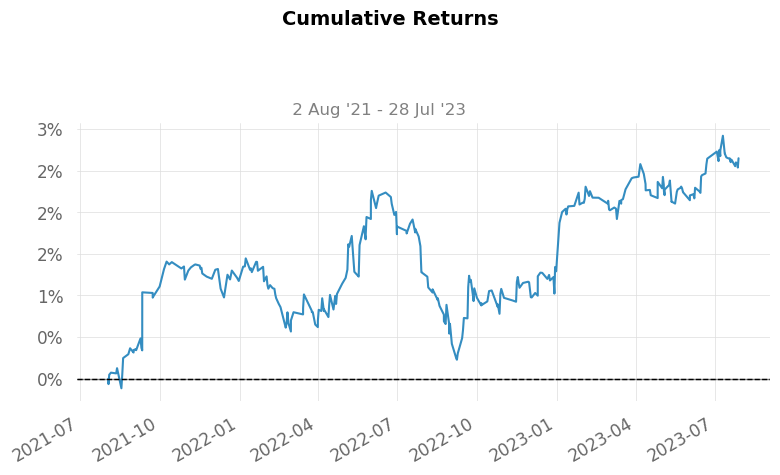

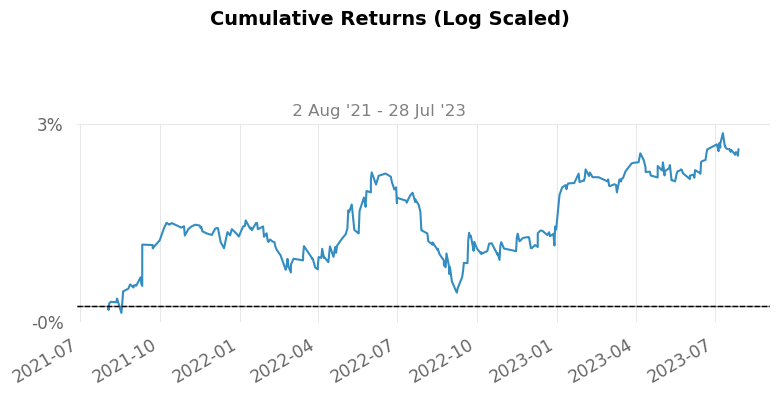

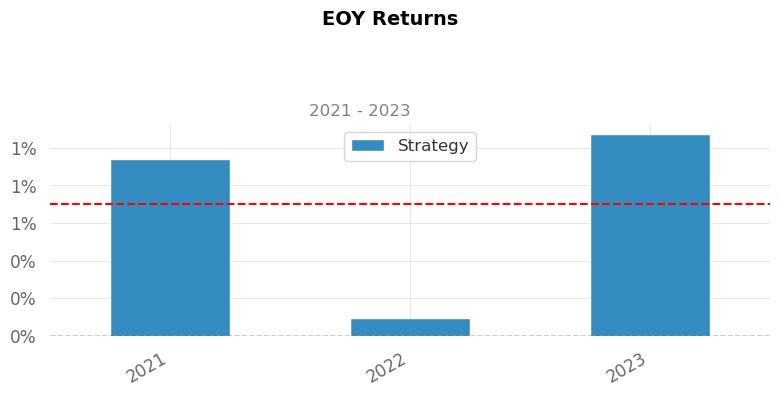

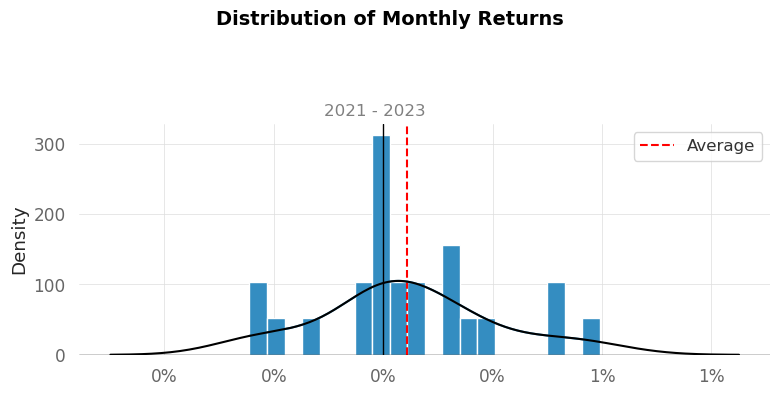

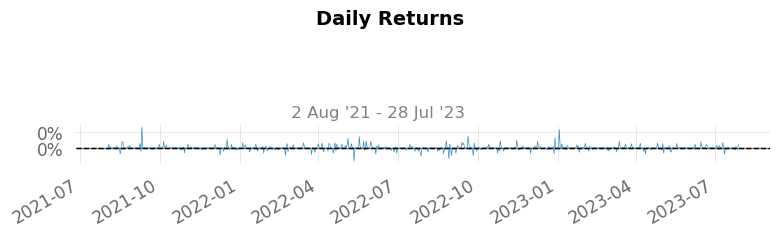

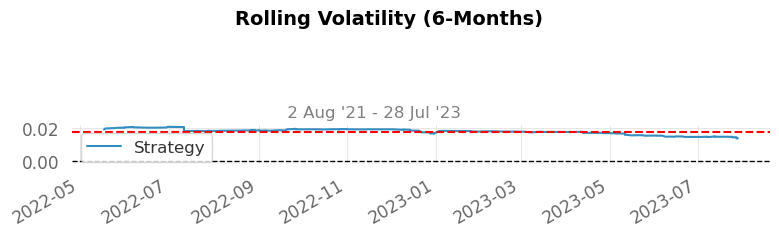

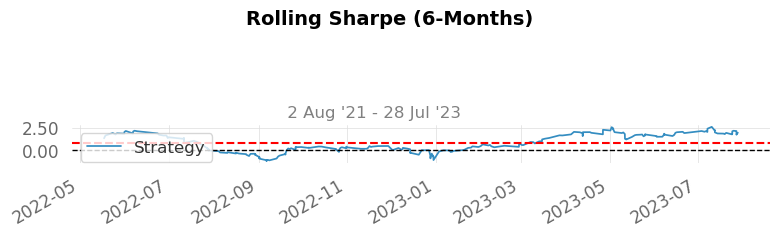

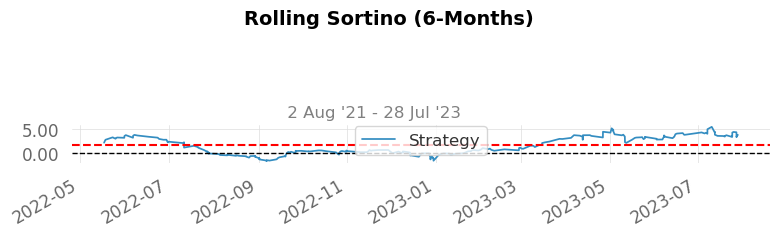

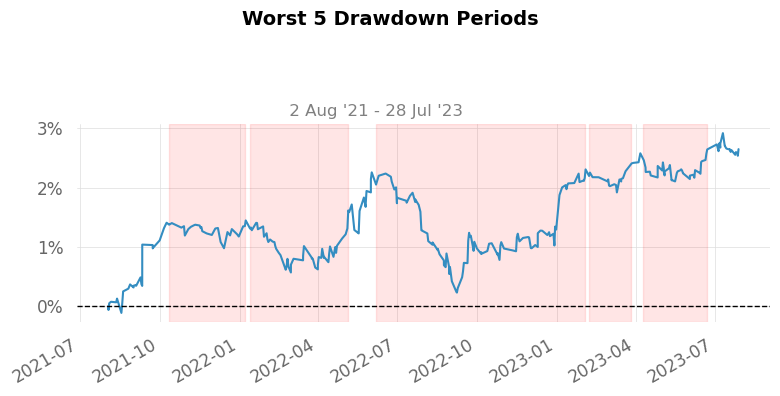

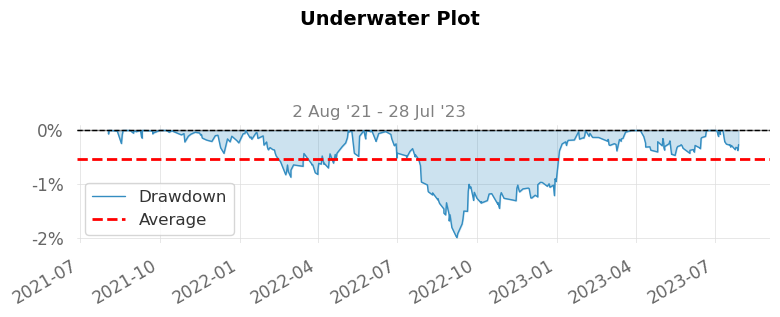

/home/om/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


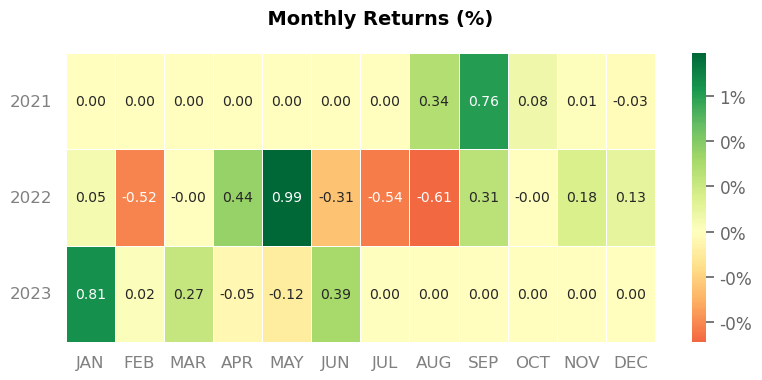

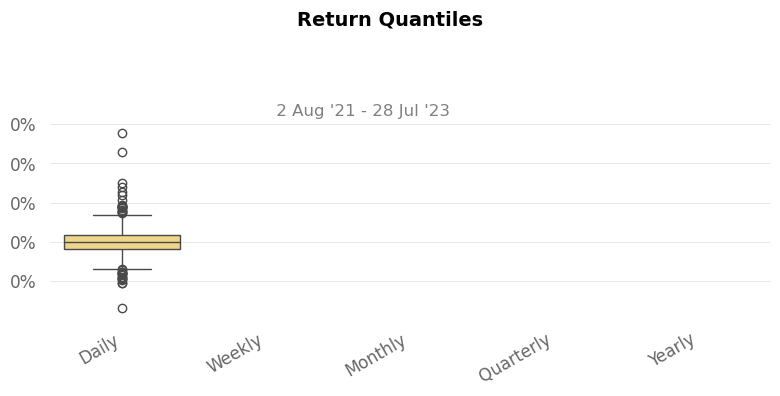

/home/om/.local/lib/python3.10/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [132]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [133]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 9e3254f1db514a9aaa174a897d401b6a |
| Transaction Type | SELL                             |
| Instrument       | NASDAQ:AAPL                      |
| Quantity         | 5                                |
| Price            | $196.51                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-30T17:42:48.120316Z | COMPLETE               |
| 2023-10-30T17:42:48.120299Z | OPEN                   |
| 2023-10-30T17:42:48.120281Z | OPEN PENDING           |
| 2023-10-30T17:42:48.120261Z | VALIDATION PENDING     |
| 2023-10-30T17:42:48.120211Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | fb1db6cf7dfd46aaa